# Text Frequency Example

## DATA 601: Fall 2019


## Warm up
    
- Please read about reading and writing files here:
  [https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files)

## Text frequency analysis

In this exercise, we'll perform a simple frequency analysis on the novel "Moby Dick" by _Herman Melville_. Here are the tasks that we'll perform.
- Read the novel from a text file, split it into words removing any punctuation and empty strings. Store the resulting words in a list (called `book`). 
- Read another text file into a list (called `top`) consisting of the 100 most frequently occuring words in the English language. 

- For each of the words in `top`, determine how many times the word appears in `book`. Keep a record of this tally in a suitable data structure.
- Rank the tallied results; the most frequent word gets rank 1, the second most frequent gets rank 2, and so on.
- Plot a rank-frequency distribution, with rank on the horizontal axis and frequency on the vertical axis.
- Compare our result with [Zipf's law](https://simple.wikipedia.org/wiki/Zipf%27s_law)

In [1]:
import re

def fileToList( fname, regexp=r'\W+' ):
    file = open(fname, 'rt')
    text = file.read()
    file.close()
    # split based on provided regular expression and remove empty strings
    # By default, matches words.
    return [x for x in re.split(regexp, text) if x]
    
book = fileToList( 'moby_dick.txt' ) # list of words in the novel
top = fileToList( 'top100.txt' ) # Top 100 words

# Print some words from the two lists
print(book[10000:10100])
print("\n")
print(top)
print("\n")
print(len(top))

['me', 'at', 'once', 'and', 'since', 'the', 'sea', 'gods', 'had', 'ordained', 'that', 'he', 'should', 'soon', 'become', 'my', 'shipmate', 'though', 'but', 'a', 'sleeping', 'partner', 'one', 'so', 'far', 'as', 'this', 'narrative', 'is', 'concerned', 'I', 'will', 'here', 'venture', 'upon', 'a', 'little', 'description', 'of', 'him', 'He', 'stood', 'full', 'six', 'feet', 'in', 'height', 'with', 'noble', 'shoulders', 'and', 'a', 'chest', 'like', 'a', 'coffer', 'dam', 'I', 'have', 'seldom', 'seen', 'such', 'brawn', 'in', 'a', 'man', 'His', 'face', 'was', 'deeply', 'brown', 'and', 'burnt', 'making', 'his', 'white', 'teeth', 'dazzling', 'by', 'the', 'contrast', 'while', 'in', 'the', 'deep', 'shadows', 'of', 'his', 'eyes', 'floated', 'some', 'reminiscences', 'that', 'did', 'not', 'seem', 'to', 'give', 'him', 'much']


['the', 'be', 'to', 'of', 'and', 'a', 'in', 'that', 'have', 'I', 'it', 'for', 'not', 'on', 'with', 'he', 'as', 'you', 'do', 'at', 'this', 'but', 'his', 'by', 'from', 'they', 'we',

[('the', 14703), ('be', 1063), ('to', 4707), ('of', 6742), ('and', 6517), ('a', 4799), ('in', 4238), ('that', 3081), ('have', 774), ('I', 2120), ('it', 2534), ('for', 1644), ('not', 1173), ('on', 1073), ('with', 1769), ('he', 1896), ('as', 1752), ('you', 958), ('do', 316), ('at', 1335), ('this', 1439), ('but', 1823), ('his', 2530), ('by', 1222), ('from', 1104), ('they', 668), ('we', 469), ('say', 244), ('her', 332), ('she', 119), ('or', 797), ('an', 600), ('will', 399), ('my', 586), ('one', 924), ('all', 1544), ('would', 432), ('there', 865), ('their', 620), ('what', 617), ('so', 1066), ('up', 526), ('out', 537), ('if', 501), ('about', 318), ('who', 366), ('get', 95), ('which', 655), ('go', 193), ('me', 629), ('when', 607), ('make', 115), ('can', 247), ('like', 647), ('time', 334), ('no', 594), ('just', 117), ('him', 1065), ('know', 153), ('take', 137), ('people', 49), ('into', 523), ('year', 27), ('your', 257), ('good', 216), ('some', 619), ('could', 217), ('them', 474), ('see', 275),

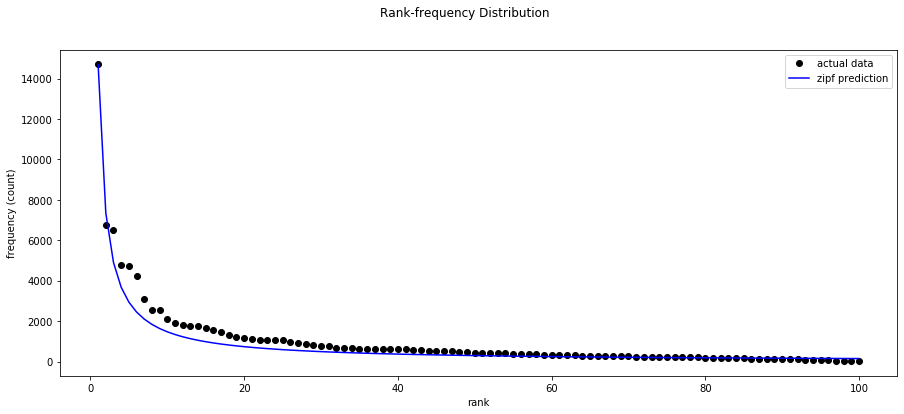

In [3]:
# normalize all words to be uppercase
book = [word.upper() for word in book]

# count occurences of top words in book
freqs = [(word,book.count(word.upper())) for word in top]
print(freqs)
print('\n')

# rank tallied results
freqs.sort(key = lambda x: x[1], reverse = True)
ranked = [(i,word[0]) for i,word in zip(range(1,len(freqs)+1),freqs)]
print(ranked)

# calculated predicted frequency based on Zipf's law
zipf_predicted = [freqs[0][1]*(1/N) for N in range(1,len(freqs)+1)]

# plot data
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot( range(1,101), [x[1] for x in freqs], 'ko')
plt.plot( range(1,101), zipf_predicted, 'b-')
# plt.yscale('log')
fig.set_size_inches(15,6)
plt.legend(('actual data', 'zipf prediction'))

plt.xlabel('rank')
plt.ylabel('frequency (count)')
plt.suptitle('Rank-frequency Distribution')
plt.show()